# Различные типы графиков

## Введение

В предыдущем модуле мы познакомились с тем, как создавать и помечать линейные графики с помощью библиотеки Matplotlib. В данном модуле мы узнаем, как создавать и когда использовать различные типы графиков такие как:
- Сравнить категорийные переменные с помощью столбчатых диаграмм
- Показать неопределенность данных с помощью показателей погрешности
- Сравнить пропорциональные наборы данных с помощью круговых диаграмм
- Анализ частотных данных с использованием гистограмм

# Простая столбчатая диаграмма

Функция *`plt.bar`* позволяет создавать простые столбчатые диаграммы для сравнения нескольких категорий данных.

Некоторые возможные данные, которые можно отобразить с помощью столбчатой диаграммы:
- Ось X - известные здания, оси y - высота
- Ось X - разные планеты, оси y - кол-во дней в году
- Ось X - языки программирования, оси y - строки кода

При вызове метода *`plt.bar`* он принимает два аргумента
- значение x - список x-позиций для каждого бара
- значения y - список данных для каждого столбца

В большинстве случаев мы хоти, чтобы наши x-значения были списком, который выглядит *`[0,1,2,3,4,...]`* и имеет то же кол-во элементов, что и наш список y-значений. Мы можем создать этот список вручную, но мы также можем использовать следующий код

```python
heights = [88, 225, 365, 687, 4333, 10756, 30687, 60190, 90553]
x_values = range(len(heights))
```

Функция *`range`* создает список последовательных целых чисел. Ей нужен аргумент, чтобы сообщить, сколько чисел должно быть в списке. Например, *`range(5)`* создаст список из 5 чисел. Мы хотим, чтобы наш список был такой же длины, как и высоты наших столбцов (*`heights`* в этом примере). *`len(heights)`* сообщит, нам сколько элементов находится в списке *`heights`*.

Вот пример того, как построить столбчатую диаграмму *`plt.bar`* для сравнения кол-ва дней в году на разных планетах

```python
days_in_year = [88, 225, 365, 687, 4333, 10756, 30687, 60190, 90553]
plt.bar(range(len(days_in_year)),
        days_in_year)
plt.show()
```

Результат кода выше будет таким

![](./img/1_1.png)

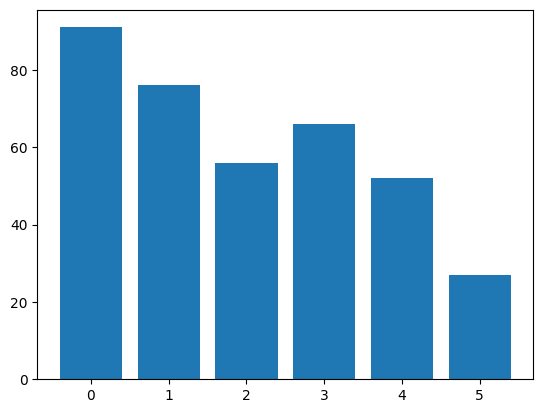

In [2]:
# Давайте поможем кафе проанализировать некоторые данные о продажах, которые они собирают.
import matplotlib.pyplot as plt

drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales =  [91, 76, 56, 66, 52, 27]

# постройте столбчатую диаграмму используя метод plt.bar
plt.bar(range(len(sales)), sales)
plt.show()

## Простая столбчатая диаграмма 2

Когда мы создаем столбчатую диаграмму, мы хотим, чтобы каждый столбец был значимым и соответствовал категории данных. На *`drinks`* диаграмме из последнего упражнения мы могли видеть, что продажи были разными для разных напитков, но это не очень помогло нам, так как мы не знали, какой столбец соответствует какому напитку.

В предыдущем блоке кода мы узнали, как настроить деления на оси X за три шага
- Создайте объект оси

`ax = plt.subplot()`

- установите позиции X, используя список чисел

`ax.set_xticks([0,1,2,3,4,5,6,7,8])`

- установите метки X, используя список строк

`ax.set_xticklabels(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto'], rotation=30)`

**Примечание:** Мы должны установить x-ticks до того, как установим x-labels, поскольку дефолтные ticks не обязательно будут одной ticks на столбец, особенно если мы строим график с большим кол-ом баров. Если мы пропустим установки x-ticks перед x-labels, то можем получить метки в неправильном месте.

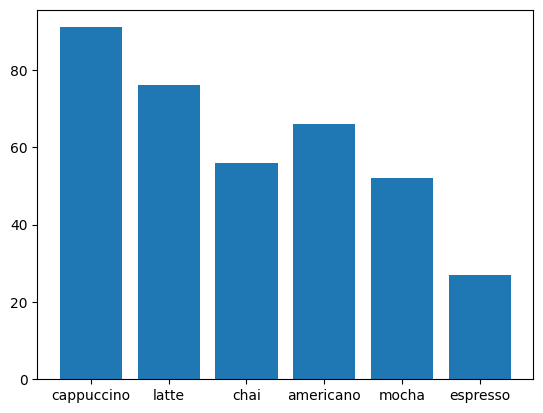

In [3]:
plt.bar(range(len(drinks)), sales)
ax = plt.subplot()
ax.set_xticks(range(len(drinks)))
ax.set_xticklabels(drinks)
plt.show()

# Side-by-Side бары

Мы можем использовать столбчатую диаграмму для сравнения двух наборов данных с одинаковыми типами значений осей. Для этого мы наносим два набора столбцов рядом друг с другом, чтобы можно было сравнить значения каждой категории. Например, вот диаграмма с расположенными рядом столбцами для населения США и Китая старше 65 лет (в процентах)

![](./img/1_2.png)

Вот несколько примеров данных, для которых могут быть полезны параллельные столбцы:
- населения двух стран с течением времени
- цены на разные блюда в двух разных ресторанах
- зщачисления в разные классы для межчин и женщин

На графике выше есть 7 наборов столбцов, по 2 столбца в каждом наборе. Каждый столбец имеет ширину 0.8 (ширина по умолчанию для всех столбцов в Matplotlib)
- Если наш первый синий столбец находится в точке x=0, то мы хотим, чтобы следующий синий столбец находился в точке x=2, а следующий - в точке x=4 и т.д.
- Наша первая оранжевая полоса должна находится в точке x=0.8 (чтобы она касалась синей полосы), а следующая оранжевая полоса должна находится в точке x=2.8 и т.д.

Это много математики, но мы можем заставить Python сделать это за нас, скопировав и вставив этот код

```python
# China Data (blue bars)
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 7 # Number of sets of bars
w = 0.8 # Width of each bar
x_values1 = [t*element + w*n for element
             in range(d)]
```

Это просто сгенерировало первый набор значений x. Чтобы сгенерировать второй набор, вставьте код снова, но измените n на 2, потому что это второй набор данных:

```python
# US Data (orange bars)
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 7 # Number of sets of bars
w = 0.8 # Width of each bar
x_values2 = [t*element + w*n for element
             in range(d)]
```

Давайте рассмотрим наш специальный код

```python
[t*element + w*n for element in range(d)]
```

Это называют list comprehansions. Это особый способ создания списка из формулы. Для создания параллельных столбчатых диаграмм вам никогда не придется менять эту строку; просто вставьте ее в свой код и убедитесь, что правильно определили n, t, d и w

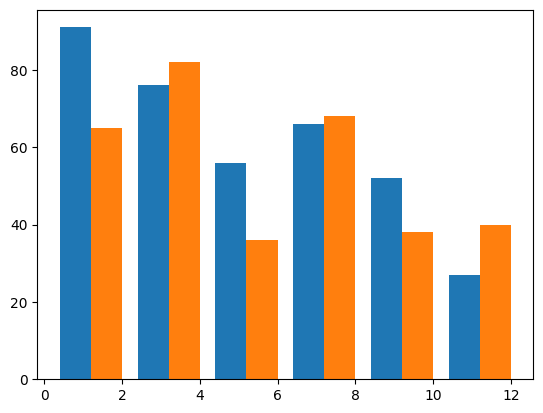

In [4]:
# Недавно открылось второе заведение по продаже напитков, и владельцы хотят сравнить выбор напитков клиентами в двух разных местах. Для этого будет полезно отобразить продажи каждого напитка на тех же осях. Мы предоставили sales2 список значений, представляющих продажи тех же напитков во втором заведении

drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales1 =  [91, 76, 56, 66, 52, 27]
sales2 = [65, 82, 36, 68, 38, 40]

#Paste the x_values code here
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
store1_x = [t*element + w*n for element
             in range(d)]

plt.bar(store1_x, sales1)
#Paste the x_values code here
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
store2_x = [t*element + w*n for element
             in range(d)]

plt.bar(store2_x, sales2)

plt.show()

# Stacked Bar

Если мы хотим сравнить два набора данных, сохраняя при этом знание общего кол-ва между ними, мы также можем сложить столбцы вместо того, чтобы размещать их рядом. Например, если кто-то составляет график часов, которые он потратил на развлечения с помощью видеоигр и книг на прошлой неделе, и хочет также получить представление об общем кол-ве часов, потраченных на развлечения, он может создать сложенную столбчатую диаграмму

![](./img/1_3.png)

Мы делаем это с помощью ключевого слова *`bottom`*. Верхний набор столюцов будет иметь *`bottom`* высоту другого набора столбцов. Таким образом, первый набор столбцов отображается нормально

```python
video_game_hours = [1, 2, 2, 1, 2]

plt.bar(range(len(video_game_hours)),
  video_game_hours) 
```

А второй набор полос *`bottom`* указал

```python
book_hours = [2, 3, 4, 2, 1]

plt.bar(range(len(book_hours)),
  book_hours,
  bottom=video_game_hours)
```

Это запускает *`book_hours`* столбцы на высоте столбцов *`video_games_hours`*. Так, например, в понедельник оранжевый столбец, представляющий часы, потраченные на чтение, начнется со значения 1 вместо 0, поскольку 1 час был потрачен на видеоигры

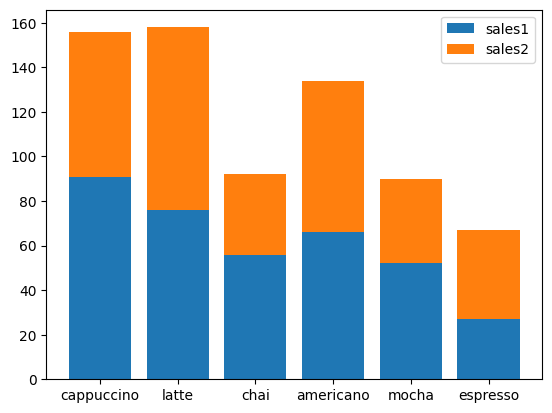

In [5]:
# Вы только что создали диаграмму с двумя наборами данных о продажах, расположенными рядом. Давайте вместо этого создадим составную столбчатую диаграмму, используя ключевое слово bottom. Поместите sales1 столбцы внизу и установите sales2, чтобы они начинались там, где sales1 заканчиваются

drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales1 =  [91, 76, 56, 66, 52, 27]
sales2 = [65, 82, 36, 68, 38, 40]

plt.bar(drinks, sales1)
plt.bar(drinks, sales2, bottom=sales1)

plt.legend(['sales1', 'sales2'])

plt.show()


# Error Bars

В предыдущем упражнении вы научились представлять данные в виде столбиков разной высоты. Иногда нам нужно визуально передать некоторую неопределенность в высоте этих столбиков. Вот несколько примеров:
- среднее кол-во учеников в классе составляет 30 человек, но некоторые классы содержат только 18 человек а другие 35
- мы измерили, что вес определенного фрукта составляет 35 г, но мы знаем, что наши весы не очень точны, поэтому истинный вес фрукта может составлять как 40 г так и 30 г.
- средняя цена газровки составляет 1 доллар, но мы также хотим сообщить, что стандартное отклонение составляет 0.2 доллара.

Чтобы визуально отобразить ошибку на столбчатой диаграмме, мы часто используем планки погрешностей, чтобы показать, где может находится каждая полоска, принимая во внимание погрешность

![](./img/1_4.png)

Каждая из черных линий называется колосой погрешности. Чем выше полоса, тем меньше мы уверены в высоте синей полосы. Горизонтальные линии вверху и внизу называются колпачками. Они облегчают чтение полос погрешности

Если бы мы хотели показать ошибку +/- 2, мы бы добавили ключевое слово *`yerr=2`* к нашей *`plt.bar`* команде. Чтобы сделать заглавгые буквы широкими и легко читаемыми, мы бы добавили ключевое слово *`capsize=10`*

```python
values = [10, 13, 11, 15, 20]
yerr = 2
plt.bar(range(len(values)), values, yerr=yerr, capsize=10)
plt.show()
```

Если нам нужно разная величина ошибки для каждого столбца, мы можем сделать ее *`yerr`* равной списку, а не одному числу

```python
values = [10, 13, 11, 15, 20]
yerr = [1, 3, 0.5, 2, 4]
plt.bar(range(len(values)), values, yerr=yerr, capsize=10)
plt.show()
```

Этот код приводит к появлению планок погрешностей разных размеров

![](./img/1_5.png)

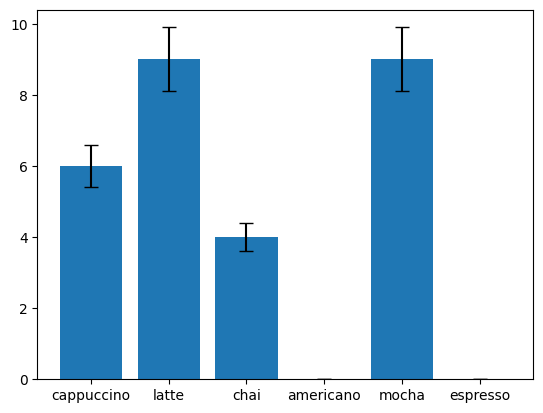

In [6]:
# Для тех, кто изучает различные типы напитков, может быть полезна столбчатая диаграмма кол-ва молоча в каждом напитке. Мы предоставили ounces_of_milk список, который содержит кол-во молока в каждом напитке объемом 12 унций в drinks списке. Отобразите эту информацию в виде столбчатой диаграммы
drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
ounces_of_milk = [6, 9, 4, 0, 9, 0]
error = [0.6, 0.9, 0.4, 0, 0.9, 0]

plt.bar(drinks, ounces_of_milk, yerr=error, capsize=5)

plt.show()


# Fill Between

Мы научились отображать ошибки на столбчатых диаграммах с использованием планок погрешностей. Давайте посмотрим, как мы можем сделать это эстетически приятным способом на линейных графиках. В Matplotlib мы можем использовать *`plt.fill_between()`* для затенения ошибки. Это функция принимает три аргумента
- *`x_values`* - это работает так же, как и значения x *`plt.plot()`*
- нижняя граница для значений y - набор данных нижней части затененной области
- верхняя граница для знчения y - устанавливает верхнюю границу затенной области

Обычно мы используем *`.fill_between()`* для создания затенной области ошибки, а затем рисуем фактическую линию поверх нее. Мы можем установить *`alpha`* ключевое слово на значение от 0 до 1 в *`.fill_between()`* вызове прозрачности, чтобы мы могли видеть линию под ним. Вот пример того, как мы будем отображать данные с ошибкой 2

```python
x_values = range(10)
y_values = [10, 12, 13, 13, 15, 19, 20, 22, 23, 29]
y_lower = [8, 10, 11, 11, 13, 17, 18, 20, 21, 27]
y_upper = [12, 14, 15, 15, 17, 21, 22, 24, 25, 31]

plt.fill_between(x_values, y_lower, y_upper, alpha=0.2) #this is the shaded error
plt.plot(x_values, y_values) #this is the line itself
plt.show()
```

Код выше выведет такой график

![](./img/1_6.png)

Необходимость вычислять *`y_lower`* и *`y_upper`* вручную отнимает много времени. Если мы попробуем просто вычесть 2 из *`y_values`*, то получим ошибку

```text
TypeError: unsupported operand type(s) for -: 'list' and 'int'
```

Чтобы правильно скадывать или вычитать элементы из списка, нам нужно использовать list compr *`y_lower = [i -2 for i in y_values]`*

Эта команда просматривает каждый элемент в *`y_values`* и называет элемет, на который она в данный момент смотрит *`i`*. Для каждого нового *`i`* она вычитает 2. Эти операции создают новый список с именем *`y_lower`*

Если мы хотим прибавить 2 к каждому элементу в *`y_values`*, мы используем этот код *`y_upper = [i + 2 for i in y_values]`*

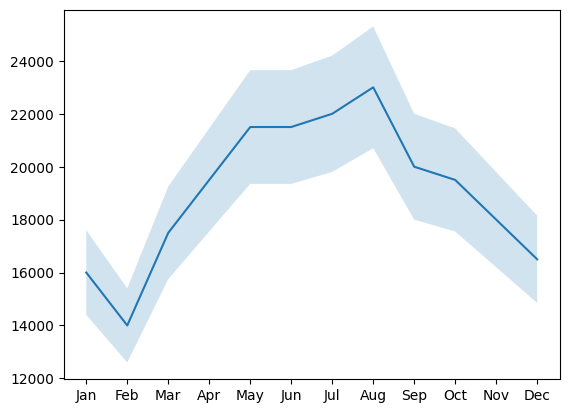

In [7]:
# мы предоставили набор данныхЮ представляющих прогнозируемый доход в месяц на следующий год в переменной revenue. Давайте отобразим эти данные к months
months = range(12)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
revenue = [16000, 14000, 17500, 19500, 21500, 21500, 22000, 23000, 20000, 19500, 18000, 16500]

plt.plot(months, revenue)

ax = plt.subplot()

ax.set_xticks(months)
ax.set_xticklabels(month_names)

y_lower = [i - i * .1 for i in revenue]
y_upper = [i + i * .1 for i in revenue]

plt.fill_between(months, y_upper, y_lower, alpha = .2)

plt.show()

# Pie Chart

Если мы хотим отобразить элементы набора данных в пропорциях к целому, мы можем использовать круговую диаграмму.

Круговые диаграммы полезны для отображения таких данных как:
- Различные этнические группы, входящие в состав школького округа
- Различные макронутриенты (углеводы, жиры, белки), входящие в состав пищи
- Различные ответы на онлайн-опос

В Matplotlib вы можете создать круговую диаграмму с помощью команды *`plt.pie`*, передав ей значения, которые вы хотите отобразить на диаграмме

```python
budget_data = [500, 1000, 750, 300, 100]

plt.pie(budget_data)
plt.show()
```

Что создаст такую диаграмму

![](./img/1_7.png)

Это выглядит странно и наклонно. Когда мы создаем круговые диаграммы в Matplotlib, мы почти всегда хоти установить оси равными, чтобы исправить эту проблему. Для этого мы используем *`plt.axis('equal')`*, что приводит к исправлению ситуации

![](./img/1_8.png)

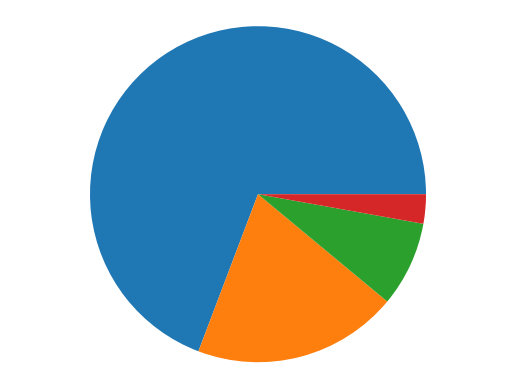

In [8]:
# Магазин отслеживает, сколько людей платят кредитной картой, наличными, Apple pay или другими способами. Это дается вам в списках payment_method_names и payment_method_freqs
payment_method_names = ["Card Swipe", "Cash", "Apple Pay", "Other"]
payment_method_freqs = [270, 77, 32, 11]

plt.pie(payment_method_freqs)
plt.axis('equal')
plt.show()

## Pie Chart Labels

Мы также хотим иметь возможность понять, что представляет собой каждый кусочек пирога. Для этого мы можем:
- использовать легенду для обозначения каждого цвета
- размещайте метки на самой диаграмме

### 1 метод

```python
budget_data = [500, 1000, 750, 300, 100]
budget_categories = ['marketing', 'payroll', 'engineering', 'design', 'misc']

plt.pie(budget_data)
plt.legend(budget_categories)
```

Это помещает названия категорий в легенду на диаграмме

![](./img/1_9.png)

### 2 метод

*`plt.pie(budget_data, labels=budget_categories)`*

Это помещает названия категорий в метки рядом с каждым соответствующим фрагментом

![](./img/1_10.png)

Еще один полезный инструмент маркировки для круговый диаграмм - добавление процента от общегоЮ которую занимает каждый сектор. Matplotlib может добавлять это автоматически с помощью ключевого слова *`autopct`*. Мы передаем инструкцию по формирования строк, чтобы отформатировать метки так, как нам нужно. Вот некоторые распрастраненные форматы
- *`'%0.2f'`* - 2 знача после запятой
- *`'%0.2f%%'`* - 2 знака после запятой, но со знаком процента в конце. Вам нужны два последовательных знака процента, потому что первый действует как жкранирующий символ, поэтому второй отображается на диаграмме
- *`'%d%%'`* - округлено до ближайшего целого *`int`* и со знаком процента в конце

Итак полный вызов *`plt.pie`* может выглядеть так

```python
plt.pie(budget_data,
        labels=budget_categories,
        autopct='%0.1f%%')
```

И результирующая диаграмма будет выглядеть так

![](./img/1_11.png)

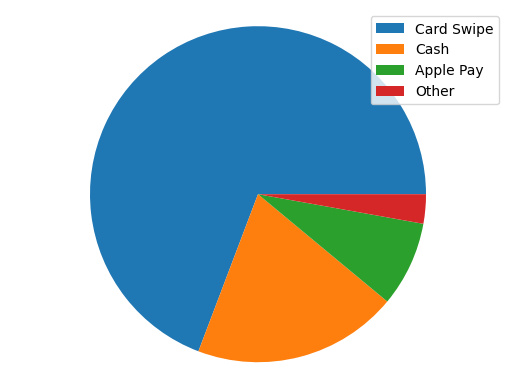

In [9]:
# Добавьте легенду к диаграмме, которую вы создали в предыдущем блоке кода, передав список меток в plt.legend. Для мето используйте список payment_method_names
plt.pie(payment_method_freqs)
plt.axis('equal')
plt.legend(payment_method_names)
plt.show()

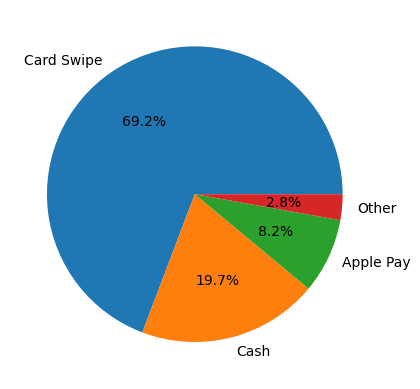

In [12]:
# Добавьте процент к каждому сразе, используя параметр Matplotlib autopct. Точность до десятой доли
plt.pie(payment_method_freqs, labels=payment_method_names, autopct='%.1f%%')
plt.show()

# Гистограмма

Иногда мы хотим получить представление о большом наборе данных со многими образцами, помимо знания только базовых метрик среднего, медианы или стандартного отклонения. Чтобы получить более интуитивное представление о наборе данных, мы можем использовать гистограмму для отображения всех значений.

Гистограмма показывает нам, сколько значений в наборе данных попадают между различными наборами чисел (т.е. сколько чисел попадают в диапазон от 0 до 10? от 10 до 20?). Каждый из этих вопросов представляет собой ячейку, например, наша первая ячейка может быть между 0 и 10.

Все ячейки в гистограмме всегда имеют одинаковый размер. Ширина каждой ячейки - это расстояние между минимальным и максимальным значениями каждой ячейки. В нашем примере ширина каждой ячейки будет равна 10.

Каждый юблок представлен отдельным прямоугольником, высока которого равна количеству элементов из набора данных, попдающих в этот блок.

Вот пример:

![](./img/1_12.png)

Чтобы создать гистограмму в Matplotlib, мы используем команду *`plt.hist`*, *`plt.hist`* находит минимальное и максимальное значение в вашем наборе данных и создает 10 равномерно распределенных интервалов между этими значениями.

Например, гистограмма выше была создана с помощью следующего кода

```python
plt.hist(dataset)
plt.show()
```

Если нам нужно больше 10 ячеек, мы можем использовать ключевое словоб *`bins`* чтобы задать значение, на сколько ячеек мы хоти разделить данные. Ключевое слово *`range`* выбирает минимальное и максимальное значения для построения графика. Например, если мы хотим взять наши данные из последнего примера и создать новую гистограмму, которая просто отбражает значения от 66 до 69, разделенные на 40 ячеек (вместо 10), мы можем использовать этот вызов функции

*`plt.hist(dataset, range=(66,69), bins=40)`*

Что приведет к гистограмме, которая будет выглядеть следующим образом

![](./img/1_13.png)

Гистограммы лучше всего подходят для отображения формы набора данных. Например, вы можете увидеть, что значения расположены близко друг к другу или смещены в одному сторону. Благодаря этой дополнительной интуиции мы часто обнаруживаем другие типы анализа, которые хотим выполнить.

In [18]:
# мы предоставили данные в файле sales_times.csv и загрузили их в список под названием sales_times. Этот набор представляет 270 продаж в первом месте с 8 утра до 10 вечера в определенный день.
import csv

def convert_time_to_num(time):
  mins = int(time[-2:])
  frac_of_hour = mins/60.0
  hour = int(time[:-3])
  time = hour + frac_of_hour
  return time

sales_times_raw = []
with open('./files/sales_times.csv') as csvDataFile:
  csvReader = csv.reader(csvDataFile)
  for row in csvReader:
    sales_times_raw.append(row[2])
  sales_times_raw = sales_times_raw[1:]

sales_times = []
for time in sales_times_raw:
  sales_times.append(convert_time_to_num(time))

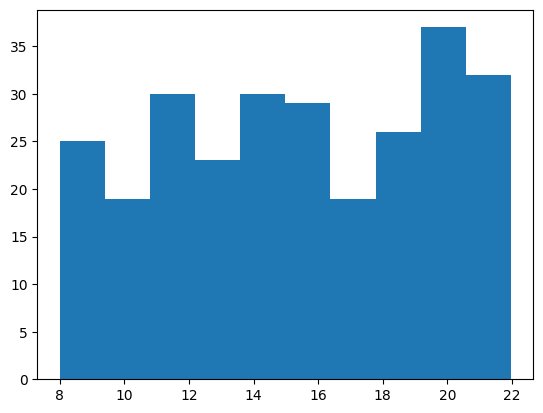

In [20]:
# Создайте гистограмму из загруженных данных

plt.hist(sales_times)
plt.show()

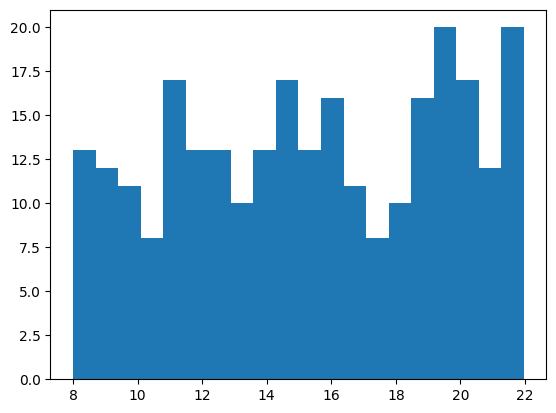

In [22]:
# Используйте bins параметр, чтобы создать 20 ячеек вместо 10

plt.hist(sales_times, bins=20)
plt.show()

# Множественные гистограммы

Если мы хоти сравить два разных распределения, мы можем поместить несколько гистграмм на один график. Это может быть полезно, например, при сравнении роста группы мужчин и группы женщин. Однако может быть сложно читать две гистограммы друг над другом. Например, на этой гистограмме мы не можем видеть весь синий график, потому что он закрыт оранжевым.

![](./img/1_14.png)

У нас есть два способа решить подобную проблему:

1. Используйте ключевое слово *`alpha`*, которая может иметь значение от 0 до 1. Данный параметр ответственнен за прозрачность гистограммы. Значение 0 сделает столбцы полностью прозрачными. Значение 1 сделает столбцы полностью непрозрачными.

```python
plt.hist(a, range=(55, 75), bins=20, alpha=0.5)
plt.hist(b, range=(55, 75), bins=20, alpha=0.5)
```

Это сделает обе гистограммы видимыми на графике:

![](./img/1_15.png)

2. Используйте ключевое слово *`histtype`* с аргументом *`'step'`*, чтобы нарисовать только контур гистограммы

```python
plt.hist(a, range=(55, 75), bins=20, histtype='step')
plt.hist(b, range=(55, 75), bins=20, histtype='step')
```

Что приводит к такой диаграмме

![](./img/1_16.png)

Другая проблема, с которой мы сталкиваемся, заключается в том, что наши гистограммы могут иметь разное кол-во образцов, делая один намного больше другого. Мы можем увидеть, как это затрудняет качественное сравнение, добавив набор данных *`b`* с гораздо большим *`size`* значением

```python
a = normal(loc=64, scale=2, size=10000)
b = normal(loc=70, scale=2, size=100000)

plt.hist(a, range=(55, 75), bins=20)
plt.hist(b, range=(55, 75), bins=20)
plt.show()
```

В результате получаются две гистограммы, которые очень труднр сравнивать

![](./img/1_17.png)

Чтобы решить эту проблему, мы можем нормализовать наши гистограммы с помощью *`density=True`*. Эта команда делит высоту каждого столбца на константу таким образом, чтобы общая затенная площадь гистограммы в сумме равнялась 1.

```python
a = normal(loc=64, scale=2, size=10000)
b = normal(loc=70, scale=2, size=100000)

plt.hist(a, range=(55, 75), bins=20, alpha=0.5, density=True)
plt.hist(b, range=(55, 75), bins=20, alpha=0.5, density=True)
plt.show()
```

Теперь нам легче увидеть различия между синим и оранжевым наборами

![](./img/1_18.png)

In [23]:
# Мы предоставили другой набор данных в файле sales_times_s2.csv, который представляет 371 продажу с 8 утра до 10 вечера того же дня. Эти данные имеют ту же структуру, что и данные о времени продаж из магазина 1, с id, card_no и time. Взгляните на данные в csv и ознакомьтесь с ними

sales_times2_raw = []
with open('./files/sales_times_s2.csv') as csvDataFile:
  csvReader = csv.reader(csvDataFile)
  for row in csvReader:
    sales_times2_raw.append(row[2])
  sales_times2_raw = sales_times2_raw[1:]

sales_times2 = []
for time in sales_times2_raw:
  sales_times2.append(convert_time_to_num(time))

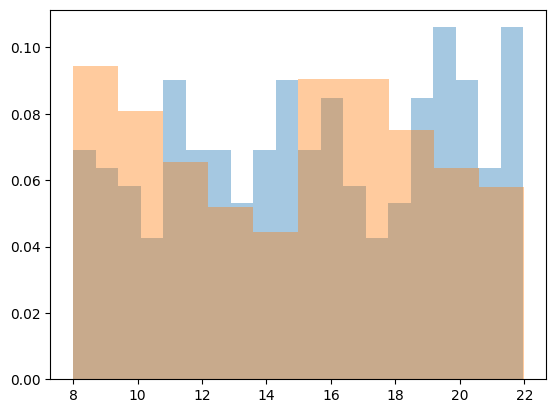

In [ ]:
# постройте гистограмму времени из второго места поверх гистограммы из последнего задания
# сделайте прозрачность .4
# и нормализуйте график
plt.hist(sales_times, bins=20, alpha=.4, density=True)
plt.hist(sales_times2, alpha=.4, density=True)
plt.show()